## Feature Engineering for NLP in Python

**Course Structure:**
* Chapter 1. Basic features and readability scores
* Chapter 2. Text preprocessing, POS tagging and NER
* Chapter 3. N-Gram models
* Chapter 4. TF-IDF and similarity scores

### CHAPTER 1. Basic features and readability scores

#### Part 1.1 Introduction to NLP feature engineering

* For any ML algorithm, data fed into it must be in **tabular form** and the features must be **numerical**
* Categorical data can be converted into numerical through **one-hot encoding**
* Use *'pd.get_dummies()'* method to achieve it
* Text data needs to be preprocessed with two steps
    1. Standardize the text (e.g: lowercase, base form)
    2. Vectorize the text (e.g: bag-of-words, tf-idf)
* Basic features about text data:
    * Number of words
    * Number of characters
    * Average length of words
* More advanced features about text data:
    * Part-Of-Speech (POS) tagging
    * Named Entity Recognition (NER)

In [1]:
# Code for part 1.1

# one-hot encoding
import pandas as pd

# create dataframe by hand
feature_1 = [29.0, 0.9167, 2.0, 30.0, 25.0, 48.0, 63.0, 39.0, 53.0, 71.0, 47.0, 18.0, 24.0, 26.0, 80.0]
feature_2 = [0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0]
feature_3 = [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
feature_4 = [211.3375, 151.55, 151.55, 151.55, 151.55, 26.55, 77.9583, 0.0, 51.4792, 49.5042, 227.525, 227.525, 69.3, 78.85, 30.0]
feature_5 = ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male']
label = [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]

df1 = pd.DataFrame({'feature_1': feature_1, 'feature_2':feature_2, 'feature_3':feature_3, 'feature_4':feature_4, 'feature_5':feature_5, 'label':label})
print(df1.columns)

# perform one-hot encoding for column 'feature_5'
df1 = pd.get_dummies(df1, columns=['feature_5'])
print(df1.columns)
print(df1.head())

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'label'],
      dtype='object')
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label',
       'feature_5_female', 'feature_5_male'],
      dtype='object')
   feature_1  feature_2  feature_3  feature_4  label  feature_5_female  \
0    29.0000          0          0   211.3375      1                 1   
1     0.9167          1          2   151.5500      1                 0   
2     2.0000          1          2   151.5500      0                 1   
3    30.0000          1          2   151.5500      0                 0   
4    25.0000          1          2   151.5500      0                 1   

   feature_5_male  
0               0  
1               1  
2               0  
3               1  
4               0  


#### Part 1.2 Basic feature extraction

**Basic feature extraction:**
* Number of characters with *'len()'* method
* Number of words with *'.split()'* and *'len()'* method
* Average word length with *'.split()'*, *'len()'*, and *'mean()'* method
* You can crate functions to apply these easier
* For special data like tweets, some special features like *hashtags* and *mentions* are worth checking on
* Use *''.startswith()* method to achieve it
* Other features :
    * Number of sentences
    * Number of paragraphs
    * Words starting with an uppercase
    * All-capital words
    * Numerical quantities

In [2]:
# Code for part 1.2

# character count of Russian tweets
import pandas as pd

# get tweets data
tweets = pd.read_csv('13_datasets/russian_tweets.csv')
# print(tweets.head())
print(tweets.columns)

# create a feature 'char_count'
tweets['char_count'] = tweets['content'].apply(len)
print("Average word length in tweets:")
print(tweets['char_count'].mean())

Index(['Unnamed: 0', 'content'], dtype='object')
Average word length in tweets:
103.462


In [3]:
# Code for part 1.2 (continue)

# word count for TED talks
import pandas as pd

# get TED talks data
ted = pd.read_csv('13_datasets/ted.csv')
# print(ted.head())
print(ted.columns)

# create a function to count number of words in string
def count_words(string):
    words = string.split()
    return len(words)

# create a new feature 'word_count'
ted['word_count'] = ted['transcript'].apply(count_words)
print('Average words in each TED talk:')
print(ted['word_count'].mean())

Index(['transcript', 'url'], dtype='object')
Average words in each TED talk:
1987.1


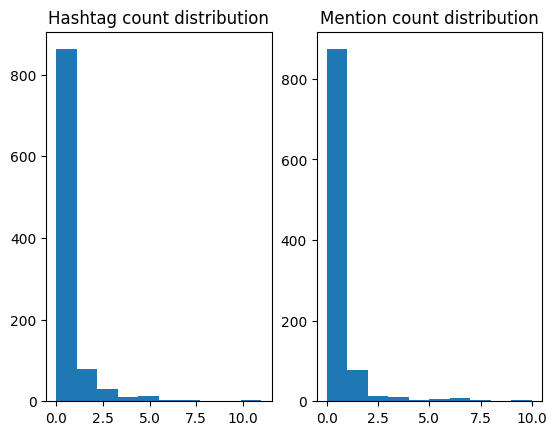

In [4]:
# Code for part 1.2 (continue)

# hashtags and mentions in Russian tweets
import pandas as pd
import matplotlib.pyplot as plt

# get tweets data
tweets = pd.read_csv('13_datasets/russian_tweets.csv')

# create functions to return number of hashtags and mentions in a string
def count_hashtags(string):
    words = string.split()
    hashtags = [word for word in words if word.startswith('#')]
    return len(hashtags)

def count_mentions(string):
    words = string.split()
    mentions = [word for word in words if word.startswith('@')]
    return len(mentions)

# create new features 'hashtag_count' and 'mention_count'
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['mention_count'] = tweets['content'].apply(count_mentions)

# create data visualizations
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(tweets['hashtag_count'])
ax2.hist(tweets['mention_count'])
ax1.set_title('Hashtag count distribution')
ax2.set_title('Mention count distribution')
plt.show()


#### Part 1.3 Readability tests

* It is used to determine the *readability* of a particular passage
* Scale ranging from *Primary School* to *College Graduate* level
* A mathematical formula with word, syllable and sentence count
* It is used in *fake news* and *opinion spam* detection
* Examples: (we go into details with first two scores)
    * **Flesch reading ease**
    * **Gunning fog index**
    * Simple Measure of Gobbledygook (SMOG)
    * Dale-Chall score
* **Textatistic** library can be used to do these tests

**Flesch reading ease:**
* One of the oldest and most widely used tests
* Dependent on two factors:
1. Average sentence length
2. Average number of syllables
* Higher the score, greater the readability (easier to understand)

**Gunning fog index:**
* Developed in 1954
* Dependent on two factors:
1. Average sentence length
2. Percentage of complex words
* Higher the score, lesser the readability (more difficult to understand)


In [5]:
# Code for part 1.4

# readability of 'The Myth of Sisyphus'
from textatistic import Textatistic

# get text file
text_file = open('13_datasets/sisyphus.txt', 'rb')
sisyphus = text_file.read()
text_file.close()
sisyphus = sisyphus.decode('utf-8')

# compute the readability scores
readability_scores = Textatistic(sisyphus).scores
flesch = readability_scores['flesch_score']

# print the scores
print('The flesch reading ease is %.2f' % (flesch))


The flesch reading ease is 81.67


In [6]:
# Code for part 1.4 (continue)

# readability vs. publications
from textatistic import Textatistic

# get strings
forbes = 'The idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.'

harvard_law = 'In his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship.'
r_digest = 'This week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.'
time_kids = 'That, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.'

# list of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# loop through
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_score = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_score)

print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


### CHAPTER 2. Text preprocessing, POS tagging and NER

#### Part 2.1 Tokenization and Lemmatization

* We need to **standardize** texts into a *machine friendly format* when text might have different sources
* Example: *reduction*, *reducing*, *reduce* mean similar things
* Text preprocessing techniques:
    * Converting words into lowercase
    * Removing leading and trailing whitespace
    * Removing punctuation
    * Removing stopwords
    * Expanding contractions
    * Removing special characters (numbers, emojis, etc.)
* **Tokenization** is the process of splitting a string into tokens, tokens can be sentences, words or punctuations
* Use *'Spacy'* library for tokenization

* **Lemmatization** is the process of converting a word into its lowercased based form or lemma
* Example: reducing, reduces, reduced, reduction -> reduce
* Example: am, is, are -> be
* Use *'Spacy'* library for lemmatization, too

In [7]:
# Code for part 2.1

# tokenizing the Gettysburg address
import spacy

# get the speech text
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

# load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# create a doc object
doc = nlp(gettysburg)

# generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

In [8]:
# Code for part 2.1 (continue)

# lammatizing the Gettysburg address
# use the same text file 'gettysburg'
import spacy

# load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# create a doc object
doc = nlp(gettysburg)

# generate the lemmas
lemmas = [token.lemma_ for token in doc]
print(' '.join(lemmas))

# note how different the text is with lemmatization

four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we 've come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we can not dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thus

#### Part 2.2 Text cleaning

**Non-alphabet:**
* *'.isalpha()'* method to return TRUE if all the characters are alphabets
* It is a convenient method to remove all (lemmatized) tokens that are or contain numbers, punctuation or emojis
* Sometimes, it would return FALSE on some words that we would not want to remove, like abbreviations, like U.S.A
* For such situations, you need to write custom functions (with *'regrex'*)

**Stopwords:**
* Stopwords are words that occur extremely commonly
* Examples: *the*, *a*, *is*, *am*, *he*, *she*
* *'SpaCy'* library has a built-in list of stopwords
* Access it with: 'spacy.lang.en.stop_words_STOP_WORDS'
* Be careful when you use third party stop words
* It is always advisable to create *your own stop words list*



In [9]:
# Code for part 2.2

# cleaning a blog post
import spacy

# get blog content
blog = 'Twenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.'

# load model and create doc object, stopwords
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)
stopwords = nlp.Defaults.stop_words

# create lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
print(' '.join(a_lemmas))



century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


#### Part 2.3 Part-of-speech tagging

* Part-of-speech (POS) tagging has an immense number of applications in NLP:
    * Word-sense disambiguation to identify the *sense of a word* in a sentence
    * Sentiment analysis
    * Question answering
    * Fake news and opinion spam detection

**POS tagging:**
* Assigning every word, its corresponding part of speech
* Example: 'Jane is an amazing guitarist.'
    * POS tagging:
        * Jane -> proper noun
        * is -> verb
        * an -> determiner
        * amazing -> adjective
        * guitarist -> noun

In [10]:
# Code for part 2.3

# POS tagging in Lord of the files
import spacy

# get text
lotf = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'

# load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# craete a doc object
doc = nlp(lotf)

# generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'SCONJ'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NUM'), ('’s', 'PART'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'NUM'), ('’s', 'PART'), ('feet', 'NOUN'), ('.', 'PUNCT')]


In [11]:
# Code for part 2.3 (continue)

# counting nouns in a piece of text
import spacy

# load model
nlp = spacy.load('en_core_web_sm')

# create functions to return number of proper nouns
def proper_nouns(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    # print (pos)
    return pos.count('PROPN')

# create function to return number of nouns
def nouns(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    # print(pos)
    return pos.count('NOUN')

# test functions
print(proper_nouns(text='Abdul, Bill and Cathy went to the market to buy apples.'))
print(nouns(text='Abdul, Bill and Cathy went to the market to buy apples.'))

3
2


In [12]:
# Code for part 2.3 (continue)

# noun usage in fake news
import pandas as pd

# get the dataframe
headlines = pd.read_csv('13_datasets/fakenews.csv',header=0)
# print(headlines.head())

# create new feature with previous function
headlines['num_propn'] = headlines['title'].apply(proper_nouns)
headlines['num_noun'] = headlines['title'].apply(nouns)

# compute and compare mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

print('Mean number of proper nouns in real and fake headlines are %.2f and %.2f respectively' % (real_propn, fake_propn))
print('Mean number of other nouns in real and fake headlines are %.2f and %.2f respectively' % (real_noun, fake_noun))

Mean number of proper nouns in real and fake headlines are 2.47 and 4.86 respectively
Mean number of other nouns in real and fake headlines are 2.25 and 1.53 respectively


#### Part 2.4 Named entity recognition (NER)

* Named entity recognition has a host of extremely useful applications:
    * Efficient search algorithms
    * Question answering
    * News article classification
    * Customer service

**Named entity recognition:**
* Identifying and classifying named entities into predefined categories
* Categories include person, organization, country, etc.
* Example: 'John Doe is a softwre engineer working at Google. He lives in France.'
    * Named entities:
        * John Doe -> person
        * Google -> organization
        * France -> country (geopolitical entity)
* Complete list of NER annotation at https://spacy.lo/api/annotation#named-entities
* Spacy's model performance is dependent on training and test data
* Train models with specialized data for nuanced cases

In [13]:
# Code for part 2.4

# named entities in a sentence
import spacy

# load model
nlp = spacy.load('en_core_web_sm')

# create a doc object
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# print all NERs and labels
for ent in doc.ents:
    print(ent.text, ent.label_)


Sundar Pichai PERSON
Google ORG
Mountain View GPE


In [14]:
# Code for part 2.4 (continue)

# identifying people mentioned in a news article
import spacy

# load model
nlp = spacy.load('en_core_web_sm')

# get text
tc = "It’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it."

# create function to find people
def find_person(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return persons

# test function
print(find_person(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


### CHAPTER 3. N-Gram models

#### Part 3.1 Building a bag of words model

**Bag of words model:**
* Extract word tokens
* Compute frequency of word tokens
* Construct a word vector out of these frequencies and vocabulary of corpus
* Achieved by *'sklearn'* library

**Text preprocessing:**
* Lemmatisation
* No punctuations
* No stopwords
* Leads to smaller vocabularies
* Reducing number of dimensions helps improve performance


In [15]:
# Code for part 3.1

# BoW model for movie taglines
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# get corpus
movies = pd.read_csv('13_datasets/movie_overviews.csv')
# print(movies.head())
corpus = movies['tagline'].dropna()

# create vectorizer object
vectorizer = CountVectorizer()

#generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.shape)

(7033, 6614)


In [16]:
# Code for part 3.1 (continue)

# analyzing dimensionality and preprocessing
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# load model
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words

# get text from dataframe
movies = pd.read_csv('13_datasets/movie_overviews.csv')
text = movies['tagline'].dropna()
text = text.reset_index(drop=True)

# convert to lem_corpus
lem_corpus = pd.Series(dtype='object')
for row in range(text.shape[0]):
    raw_text = str(text[row]).lower()
    doc = nlp(raw_text)
    lemmas = [token.lemma_ for token in doc]
    text_new = pd.Series(' '.join([lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]))
    # lem_corpus = lem_corpus.append(text_new)
    lem_corpus = pd.concat([lem_corpus, text_new], ignore_index=True)

# create vectorizer object
vectorizer = CountVectorizer()

# generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)
print(bow_lem_matrix.shape)

# note how column number decrease from 6614 to 4941, it really reduces the dimension of the BoW matrix

(7033, 4941)


In [17]:
# Code for part 3.1 (continue)

# mapping feature indices with feature names
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# get corpus
corpus = ['The lion is the king of the jungle', 'Lions have lifespans of a decade', 'The lion is an endangered species']

# create vectorizer object
vectorizer = CountVectorizer()

# generate bow_matrix
bow_matrix = vectorizer.fit_transform(corpus)

# convert bow_matrix into dataframe
bow_df = pd.DataFrame(bow_matrix.toarray())
bow_df.columns = vectorizer.get_feature_names_out()
print(bow_df)

# note how the word counts number match the words

   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1  


#### Part 3.2 Building a BoW Naive Bayes classifier

**Steps for building ML modles for text tasks:**
1. Text preprocessing
2. Building a bog-of-words model (or representation)
3. Machine learning

**Text preprocessing using CountVectorizer arguments:**
* *'lowercase'*: *'False'*, *'True'*
* *'strip_accents'*: *'unicode'*, *'ascii'*, *None*
* *'stop_words'*: *'english'*, *list*, *None*
* *'token_pattern'*: *regex*
* *'tokenizer'*: *function*
* However, it **CANNOT** perform lemmatization job automatically

**Building the BoW model:**
* Use *'fit_transform()'* method on training data set
* Use *'transform()'* method on testing data set

**Machine learning with Naive Bayes classifier:**
* Recall from course 12: Naive Bayes is efficient and simple for text machine learning problems
* Use *sklearn* library to get the module needed
* Use *'.score()'* method to calculate the accuracy as metrics

In [18]:
# Code for part 3.2

# BoW vectors for movie reviews
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# get dataframe
movie_reviews = pd.read_csv('13_datasets/movie_reviews_clean.csv')
X = movie_reviews['review']
y = movie_reviews['sentiment']

# split the data into training ,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=111)

# create vectorizer object and do preprocessing job with CountVectorizer()
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# fit and transform X_train, X_test
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print(X_train_bow.shape)
print(X_test_bow.shape)

(250, 7662)
(750, 7662)


In [19]:
# Code for part 3.2 (continue)

# predicting the sentiment in a movie review

# create model
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

# measure accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# predict sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

# note how good the model actually works for new negative review

The accuracy of the classifier on the test set is 0.731
The sentiment predicted by the classifier is 0


#### Part 3.3 Building n-gram models

**BoW shrotcomings:**
* Context of the words is lost
* Sentiment dependent on the position of word *'not'*

**n-grams:**
* Contiguous sequence of *n* elements (or words) in a given document
* n = 1 -> Bag-of-words (BOW) model
* Capture more context
* Applications:
    * Sentence completion
    * Spelling correction
    * Machine translation correction
* Example: *'for you a thousand times over'*
    * n = 2, n-grams:  ['for  you', 'you a', 'a thousand', 'thousand times', 'times over']
    * n = 3, n-grams: ['for you a', 'you a thousand', 'a thousand times', 'thousand times over']
* Shortcomings:
    * Curse of dimensionality
    * Higher ordre n-grams are rare
    * Keep *n* small

In [20]:
# Code for part 3.3

# n-grams for movie tag lines
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# get corpus and convert type 'object' to 'unicode'
movies = pd.read_csv('13_datasets/movie_overviews.csv')
corpus = movies['tagline'].values.astype('U')
print(corpus.dtype)

# generate n-grams up to n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# generate n-grams up to n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# generate n-grams up to n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1,3))
ng3 = vectorizer_ng3.fit_transform(corpus)

print('ng1, ng2, ng3 have %i, %i and %i features respectively' %(ng1.shape[1], ng2.shape[1], ng3.shape[1]))

<U252
ng1, ng2, ng3 have 6615, 37101 and 76882 features respectively


In [21]:
# Code for part 3.3 (continue)

# higher order n-grams for sentiment analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# get dataframe
movie_reviews = pd.read_csv('13_datasets/movie_reviews_clean.csv')
X = movie_reviews['review']
y = movie_reviews['sentiment']

# split the data into training ,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=111)

# create vectorizer object and n_grams to n=2
vectorizer_ng = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))

# fit and transform X_train, X_test
X_train_ng = vectorizer_ng.fit_transform(X_train)
X_test_ng = vectorizer_ng.transform(X_test)

# create model
clf_ng = MultinomialNB()
clf_ng.fit(X_train_ng, y_train)

# measure accuracy
accuracy = clf_ng.score(X_test_ng, y_test)
print('The accuracy of the classifier on the test set is %.3f' % accuracy)

# predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(vectorizer_ng.transform([review]))[0]
print('The sentiment predicted by the classifier is %i' %(prediction))

The accuracy of the classifier on the test set is 0.796
The sentiment predicted by the classifier is 0


In [22]:
# Code for part 3.3 (continue)

# comparing performance of n-gram models
import pandas as pd
import time
from sklearn.naive_bayes import MultinomialNB

# get dataframe
df = pd.read_csv('13_datasets/movie_reviews_clean.csv')
# print(df.head())

# set starting time
start_time = time.time()

# split data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# generate n-grams n=1
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# create model
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(X_test, y_test), X_train.shape[1]))

The program took 0.150 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [23]:
# Code for part 3.3 (continue)

# repeat and set n=3
# set starting time
start_time = time.time()

# split data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# generate n-grams n=1
vectorizer = CountVectorizer(ngram_range=(1,3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# create model
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(X_test, y_test), X_train.shape[1]))

# note  how the time and number of the dimension increases as we set n=3.

The program took 0.785 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


### CHAPTER 4. TF-IDF and similarity scores

#### Part 4.1 Building tf-idf document vectors

**n-grams modeling:**
* Weight of dimension dependent on the frequency of the word corresponding to the dimension
* Some words occur very commonly across all documents
* Words that DO NOT occur across all documents should weight more

**Term-frequency-inverse document frequency (TF-IDF):**
* Proportional to term frequency
* Inverse function of the number of documents in which it occurs
* Formula is shown as follows:

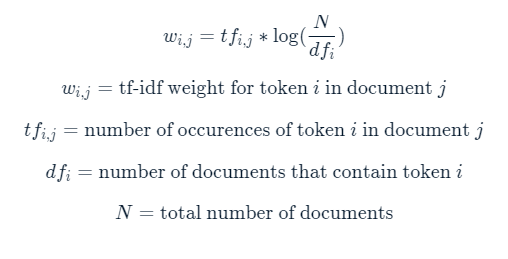

In [24]:
# display image
from IPython import display
display.Image("Images/12_tf_idf.PNG")

In [25]:
# Code for part 4.1

# tf-idf vectors for TED talks
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# get dataframe and text
ted_df = pd.read_csv('13_datasets/ted.csv')
ted = ted_df['transcript']
print(ted.head())

# create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)
print(tfidf_matrix.shape)


0    We're going to talk — my — a new lecture, just...
1    This is a representation of your brain, and yo...
2    It's a great honor today to share with you The...
3    My passions are music, technology and making t...
4    It used to be that if you wanted to get a comp...
Name: transcript, dtype: object
(500, 29158)


#### Part 4.2 Cosine similarity

**Cosine Similarity:**
* It is an important metrics in NLP to determine the similarity of two vectors and sequentially two documents
* It is the ratio of the **dot product** of the vectors and the **product of the magnitude** of the two vectors
* Value between -1 and 1; in NLP, value between 0 and 1
* Robust to document length

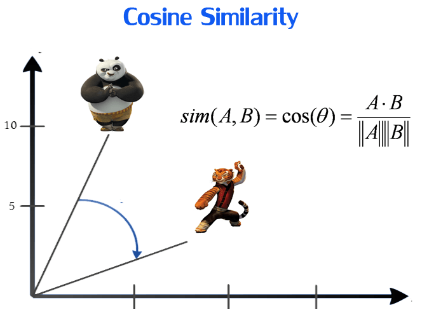

In [26]:
# display image
from IPython import display
display.Image("Images/13_cosine_similarity.PNG")

**Dot Product:**
* Consider two vectors,
$$V = (v_{1}, v_{2}, .., v_{n}), W = (w_{1}, w_{2}, ..., w_{n})$$,
* Then the dot product of V and W is,
$$V \cdot W = (v_{1} \times w_{1}) + (v_{2} \times w_{2}) + ... + (v_{n} \times w_{n}) $$
* Example:
$$ A = (4, 7, 1), B = (5, 2, 3) $$
$$ A \cdot B = (4 \times 5) + (7 \times 2) + (1 \times 3) = 37$$

**Magnitude of a vector:**
* It means the length of a vector
* Mathematically, it is defined as the square root of the sum of the squares of the values
* For any vector,
$$V = (v_{1}, v_{2}, ..., v_{n}$$
* The magnitude is defined as,
$$||V|| = \sqrt{(v_{1})^2 + (v_{2})^2 + ... + (v_{n})^2}$$
* Example:
$$ A = (4, 7, 1), B = (5, 2, 3) $$
$$||A|| = \sqrt{(4)^2 + (7)^2 +  (1)^2} = \sqrt{66}$$
$$||B|| = \sqrt{(5)^2 + (2)^2 + (3)^2} = \sqrt{38}$$

**The cosine score:**
* Example:
* Then,
$$ cos(A, B) = \frac {A \cdot B} {|A| \cdot |B|} $$
$$ = \frac {37} {\sqrt{66} \times \sqrt{38}} = 0.7388$$

In [27]:
# Code for part 4.2

# computing dot product
import numpy as np

# initialize numpy vectors
A = np.array([1, 3])
B = np.array([-2, 2])

# compute dot product
dot_prod = np.dot(A, B)
print(dot_prod)

4


In [28]:
# Code for part 4.2 (continue)

# cosine similarity matrix of a corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# get corpus
corpus =  ['The sun is the largest celestial body in the solar system', 'The solar system consists of the sun and eight revolving planets', 'Ra was the Egyptian Sun God', 'The Pyramids were the pinnacle of Egyptian architecture', 'The quick brown fox jumps over the lazy dog']

# initialize tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer()

# generate tf-idf vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


#### Part 4.3 Building a plot line based recommender

* We will use *tf-idf vectors* and *cosine scores* to build a recommender system
* Steps:
1. Text preprocessing
2. Generate tf-idf vectors
3. Generate cosine similarity matrix
4. Build the recommender function

**The recommender function:**
1. Take a movie title, cosine similarity and indices series as arguments
2. Extract pairwise cosine similarity scores for the movie
3. Sort the scores in descending order
4. Output titles corresponding to the highest score
5. Ignore the highest similarity score (of 1), which is the movie itself

**linear_kernel and cosine_similarity:**
* *'linear_kernel'* sets the magnitude of a tf-idf vector to1
* Cosine score between two tf-idf vectors is their dot product
* Can significantly improve computation time
* Use *'linear_kernel'* to replace *'cosine_similarity'*

In [29]:
# Code for part 4.3

# comparing linear_kernel and cosine_similarity
# use the tf-idf matrix created from earlier exercise
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import time

# get tf-idf matrix
ted_df = pd.read_csv('13_datasets/ted.csv')
ted = ted_df['transcript']
# print(ted.head())

# create TfidfVectorizer object
vectorizer = TfidfVectorizer()
# generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# record the time
start = time.time()

# compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# print(cosine_sim)
print("Time taken: %s seconds" %(time.time() - start))

Time taken: 0.09973764419555664 seconds


In [30]:
# Code for part 4.3 (continue)

# record the time
start = time.time()

# compute cosine similarity matrix with linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
# print(cosine_sim)
print("Time taken: %s seconds" %(time.time() - start))

# note how the linear_kernel improves the time taken to calculate cosine similarity

Time taken: 0.10169768333435059 seconds


In [31]:
# create function 'get_recommendations'
movies = pd.read_csv('13_datasets/movie_overviews.csv')

def get_recommendations(title, cosine_sim, indices):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [32]:
# Code for part 4.3 (continue)

# plot recommendation engine
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# get text/corpus
movies = pd.read_csv('13_datasets/movie_overviews.csv')
# print(movies.head())

# create 'movie_plots' and 'indices'
movie_plots = movies['overview'].dropna()
# print(movie_plots)

indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
# print(indices)

# initialize the tf-idf vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# construct tf-idf matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)
# print(tfidf_matrix.shape)

# generate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
# print(cosine_sim)
# print(cosine_sim.shape)

# generate recommendations
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

5401            The Stepford Wives
994                      Braindead
3795                   On the Line
5983                        3-Iron
8517                Particle Fever
3331    Elvis That's the Way It Is
5130                      Dogville
8123                  End of Watch
8666                   The Captive
4132      She Wore a Yellow Ribbon
Name: title, dtype: object


In [35]:
# Code for part 4.3 (continue)

# TED talk recommender
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# get TED talks
ted = pd.read_csv('13_datasets/ted.csv', header=0).drop_duplicates()
titles = ['10 top time-saving tech tips',
          'Who am I? Think again',
          '"Awoo"',
          'What I learned from 2,000 obituaries',
          "Why giving away our wealth has been the most satisfying thing we've done",
          'How to save the world (or at least yourself) from bad meetings',
          'Photos that changed the world',
          'For parents, happiness is a very high bar',
          'Cradle to cradle design',
          "To create for the ages, let's combine art and engineering",
          'Art made of storms',
          "How I'm fighting bias in algorithms",
          "There's no shame in taking care of your mental health",
          'Singing the primal mystery',
          'Fighters and mourners of the Ukrainian revolution',
          'What really motivates people to be honest in business',
          '3 ways to spot a bad statistic',
          "Why stay in Chernobyl? Because it's home.",
          'How the blockchain will radically transform the economy',
          'The hidden influence of social networks',
          'How your brain tells you where you are',
          'How to get better at the things you care about',
          'A new equation for intelligence',
          'The hunt for General Tso',
          'How the Internet enables intimacy',
          'How data from a crisis text line is saving lives',
          'Happiness in body and soul',
          'A dance in a hurricane of paper, wind and light',
          'A vision for sustainable restaurants',
          'Visualizing the wonder of a living cell',
          'Why would God create a tsunami?',
          'A hospital tour in Nigeria',
          'Dance to change the world',
          "Why we shouldn't trust markets with our civic life",
          'Why buses represent democracy in action',
          'The playful search for beauty',
          '10 ways to have a better conversation',
          'Science can answer moral questions',
          'How I learned to stop worrying and love "useless" art',
          'A flying camera ... on a leash',
          'Does money make you mean?',
          "Haiti's disaster of engineering",
          '"St. James Infirmary Blues"',
          'Meet e-Patient Dave',
          'How radio telescopes show us unseen galaxies',
          'When people of Muslim heritage challenge fundamentalism',
          'The music wars',
          'Meet BRCK, Internet access built for Africa',
          'A light switch for neurons',
          'A life lesson from a volunteer firefighter',
          'The unheard story of David and Goliath',
          'Meet the inventor of the electronic spreadsheet',
          'A future beyond traffic gridlock',
          'To upgrade is human',
          'How to succeed? Get more sleep',
          'Letting go of God',
          'The business logic of sustainability',
          'An Iraq war movie crowd-sourced from soldiers',
          'On violin and cello, "Passacaglia"',
          "You can grow new brain cells. Here's how",
          'A brain in a supercomputer',
          'Turning trash into toys for learning',
          "Sometimes it's good to give up the driver's seat",
          'How an obese town lost a million pounds',
          "Why our IQ levels are higher than our grandparents'",
          "India's invisible innovation",
          'A secret memorial for civilian casualties',
          'What humans can learn from semi-intelligent slime',
          'A father-daughter dance ... in prison',
          'New rules for rebuilding a broken nation',
          'Crowdsource your health',
          'An entertainment icon on living a life of meaning',
          'Image recognition that triggers augmented reality',
          "How equal do we want the world to be? You'd be surprised",
          "Why I'm rowing across the Pacific",
          'Drawings that show the beauty and fragility of Earth',
          'Unseen footage, untamed nature',
          'The single biggest reason why startups succeed',
          'The human insights missing from big data',
          "What do we do when antibiotics don't work any more?",
          'Adventures in Twitter fiction',
          'The paradox of choice',
          'My message of peace from Pakistan',
          'Pop culture in the Arab world',
          'Are we designed to be sexual omnivores?',
          'The hidden light of Afghanistan',
          'A complicated hero in the war on dictatorship',
          'The sore problem of prosthetic limbs',
          "How we're harnessing nature's hidden superpowers",
          '4 pillars of college success in science',
          'What happens when our computers get smarter than we are?',
          'The transformative power of classical music',
          'Hunting for dinosaurs showed me our place in the universe',
          'A dance to honor Mother Earth',
          'Fun, fierce and fantastical African art',
          '7 rules for making more happiness',
          'How to avoid surveillance ... with the phone in your pocket',
          'Israel and Iran: A love story?',
          'The wireless future of medicine',
          'The year I was homeless',
          "What doctors don't know about the drugs they prescribe",
          'This virtual lab will revolutionize science class',
          'How I hacked online dating',
          'New insights on poverty',
          '4 lessons I learned from taking a stand against drugs and gun violence',
          'The clues to a great story',
          'The route to a sustainable future',
          'See invisible motion, hear silent sounds',
          'The  4 a.m. mystery',
          'You smell with your body, not just your nose',
          'Why not make video games for girls?',
          'The gospel of doubt',
          'How Africa can keep rising',
          'Will our kids be a different species?',
          'A demo of wireless electricity',
          'Want to be happier? Stay in the moment',
          'Is the obesity crisis hiding a bigger problem?',
          'Profit’s not always the point',
          'The DIY orchestra of the future',
          'The day I stood up alone',
          'Averting the climate crisis',
          '1.3m reasons to re-invent the syringe',
          'A glimpse of life on the road',
          "A broken body isn't a broken person",
          "How we'll fight the next deadly virus",
          'How to protect fast-growing cities from failing',
          'My 12 pairs of legs',
          'A better way to talk about love',
          'A story about knots and surgeons',
          'New York -- before the City',
          'Religion, evolution, and the ecstasy of self-transcendence',
          'Using biology to rethink the energy challenge',
          'No one should die because they live too far from a doctor',
          "What's wrong with what we eat",
          'The loves and lies of fireflies',
          'Chemical scum that dream of distant quasars',
          'My wish: A global day of film',
          'The new era of positive psychology',
          'Fighting cancer with dance',
          'We need to talk about an injustice',
          'Making law on the high seas',
          'Inside the mind of a master procrastinator',
          'The real future of space exploration',
          'The story behind the Mars Rovers',
          'If cars could talk, accidents might be avoidable',
          "10 things you didn't know about orgasm",
          'Fighting viruses, defending the net',
          'Immigrant voices make democracy stronger',
          'The long reach of reason',
          'My journey into movies that matter',
          'Tales of passion',
          'What hallucination reveals about our minds',
          'The shocking move to criminalize nonviolent protest',
          'What a bike ride can teach you',
          'A practical way to help the homeless find work and safety',
          'How to fix a broken education system ... without any more money',
          'A Magna Carta for the web',
          'Why we do what we do',
          'The future race car -- 150mph, and no driver',
          'The first 21 days of a bee’s life',
          'The beauty and diversity of Muslim life',
          "A dive into the reef's Twilight Zone",
          "Life's third act",
          'Why we need gender-neutral bathrooms',
          'The great penguin rescue',
          'We can recycle plastic',
          "Looks aren't everything. Believe me, I'm a model.",
          'Smart failure for a fast-changing world',
          'Lose your ego, find your compassion',
          'How trees talk to each other',
          'Global population growth, box by box',
          "What happens when you have a disease doctors can't diagnose",
          "How pollution is changing the ocean's chemistry",
          'The ancient ingenuity of water harvesting',
          'Why you should talk to strangers',
          'Building unimaginable shapes',
          'Let’s try emotional correctness',
          'Teach girls bravery, not perfection',
          'How the US should use its superpower status',
          'Be suspicious of simple stories',
          'Post-crash, investing in a better world',
          'A modern take on piano, violin, cello',
          'A university for the coming singularity',
          'Smash fear, learn anything',
          'A monkey that controls a robot with its thoughts. No, really.',
          'Exploring the mind of a killer',
          'Social experiments to fight poverty',
          "Let's pool our medical data",
          'The art of the eco-mindshift',
          'Growing evidence of brain plasticity',
          "Don't ask where I'm from, ask where I'm a local",
          'High-altitude wind energy from kites!',
          'A third way to think about aid',
          'The shared experience of absurdity',
          'Got a smartphone? Start broadcasting',
          'How racism makes us sick',
          'The discovery that could rewrite physics',
          'Breakthrough designs for ultra-low-cost products',
          'The art of stillness',
          'A sci-fi vision of love from a 318-year-old hologram',
          '4 ways to build a human company in the age of machines',
          'How state budgets are breaking US schools',
          'The economic case for preschool',
          'How too many rules at work keep you from getting things done',
          "Google's driverless car",
          "Why is 'x' the unknown?",
          'How to make work-life balance work',
          "What's the next window into our universe?",
          '"(Nothing But) Flowers" with string quartet',
          'Political common ground in a polarized United States',
          "The four fish we're overeating -- and what to eat instead",
          'We can reprogram life. How to do it wisely',
          'What is so special about the human brain?',
          'Dance vs. powerpoint, a modest proposal',
          'Hamilton vs. Madison and the birth of American partisanship',
          'Building a museum of museums on the web',
          'Health and the human mind',
          'Non-lethal weapons, a moral hazard?',
          'What intelligent machines can learn from a school of fish',
          "A new way to study the brain's invisible secrets",
          'What it takes to be a great leader',
          'The case for letting business solve social problems',
          'Why design should include everyone',
          'Designing books is no laughing matter. OK, it is.',
          'A simple solution to the coming phosphorus crisis',
          "The killer American diet that's sweeping the planet",
          "Here's how we take back the Internet",
          'I am my connectome',
          'A highly scientific taxonomy of haters',
          "Own your body's data",
          'How to get your ideas to spread',
          'A mobile fridge for vaccines',
          'How to get back to work after a career break',
          'Massively multi-player… thumb-wrestling?',
          "Why aren't we more compassionate?",
          'A flirtatious aria',
          'How AI can bring on a second Industrial Revolution',
          'How we can eat our landscapes',
          "The secret US prisons you've never heard of before",
          "Autism — what we know (and what we don't know yet)",
          "Let's put birth control back on the agenda",
          "The camel's hump",
          "Don't insist on English!",
          'Luke, a new prosthetic arm for soldiers',
          "Dive into an ocean photographer's world",
          'A boat carrying 500 refugees sunk at sea. The story of two survivors',
          'What a driverless world could look like',
          'Why we make bad decisions',
          'Questioning the universe',
          'Ending hunger now',
          'The passing of time, caught in a single photo',
          'Lessons from past presidents',
          'Mothers helping mothers fight HIV',
          'Forget Wi-Fi. Meet the new Li-Fi Internet',
          'When workers own companies, the economy is more resilient',
          'On technology and faith',
          'Can art amend history?',
          'Solving medical mysteries',
          'On tennis, love and motherhood',
          "It's time to redesign medical data",
          'The sound the universe makes',
          'We are all designers',
          'Saving for tomorrow, tomorrow',
          'The stories behind the bloodlines',
          'Why mayors should rule the world',
          'A warrior’s cry against child marriage',
          'The ghastly tragedy of the suburbs',
          'What makes us feel good about our work?',
          'How your pictures can help reclaim lost history',
          "A doctor's case for medical marijuana",
          "Alzheimer's is not normal aging — and we can cure it",
          '5 ways to kill your dreams',
          'Augmented-reality maps',
          'The lost art of letter-writing',
          'In praise of slowness',
          "New York's streets? Not so mean any more",
          'It’s our city. Let’s fix it',
          '10 ways the world could end',
          'Why a good book is a secret door',
          "Love -- you're doing it wrong",
          'The 1s and 0s behind cyber warfare',
          'How a video game might help us build better cities',
          'Talk nerdy to me',
          'The history of our world in 18 minutes',
          'Photos of endangered cultures',
          'An intergalactic guide to using a defibrillator',
          'Nature vs. humans',
          "A TED speaker's worst nightmare",
          'Wry photos that turn stereotypes upside down',
          'The power of introverts',
          'Are you human?',
          'Music is medicine, music is sanity',
          'What if our healthcare system kept us healthy?',
          'The spellbinding art of human anatomy',
          'How cognitive surplus will change the world',
          'Why good leaders make you feel safe',
          'One woman, five characters, and a sex lesson from the future',
          "This country isn't just carbon neutral -- it's carbon negative",
          'My journey to yo-yo mastery',
          'Why good hackers make good citizens',
          'Walk the earth ... my 17-year vow of silence',
          'Why we need to end the era of orphanages',
          'Why nations should pursue soft power',
          'What separates us from chimpanzees?',
          'When Black women walk, things change',
          '7 principles for building better cities',
          'The untapped genius that could change science for the better',
          'A census of the ocean',
          'The beautiful math of coral',
          'Tracking ancient diseases using ... plaque',
          'My daughter, Malala',
          'Sputnik mania',
          "The Panama Papers exposed a huge global problem. What's next?",
          'How to rebuild a broken state',
          'Experiments that point to a new understanding of cancer',
          'There might just be life on Mars',
          'Tales of creativity and play',
          'Shake up your story',
          'I love being a police officer, but we need reform',
          'Four principles for the open world',
          'Listening to global voices',
          'Why your worst deeds don’t define you',
          'Why we laugh',
          'How boredom can lead to your most brilliant ideas',
          'We need to feed the whole world',
          'How fake news does real harm',
          "Please, please, people. Let's put the 'awe' back in 'awesome'",
          'How to land on a comet',
          'Swim with the giant sunfish',
          'Life science in prison',
          'The risky politics of progress',
          "Let's transform energy -- with natural gas",
          'Transplant cells, not organs',
          'Kids need structure',
          'If I should have a daughter ...',
          'The thrilling potential of SixthSense technology',
          'The freakonomics of crack dealing',
          'Why civilians suffer more once a war is over',
          'The mathematics of history',
          'A father-daughter bond, one photo at a time',
          'How to live to be 100+',
          'How to reduce poverty? Fix homes',
          'The moral bias behind your search results',
          'Why smart statistics are the key to fighting crime',
          'The sticky wonder of gecko feet',
          'Refugees have the right to be protected',
          'Know thyself, with a brain scanner',
          'Great design is serious, not solemn',
          'Treating cancer with electric fields',
          'The line between life and not-life',
          'Why you should know how much your coworkers get paid',
          "A young scientist's quest for clean water",
          'Why I brought Pac-Man to MoMA',
          'Why I take the piano on the road ... and in the air',
          "What we don't know about Europe's Muslim kids",
          'The untouchable music of the theremin',
          "Tour Microsoft's Virtual Earth",
          'Re-engineering the brain',
          'The world needs all kinds of minds',
          "A test that finds 3x more breast tumors, and why it's not available to you",
          'The incredible inventions of intuitive AI',
          'Embrace the near win',
          "The world's English mania",
          'Playing with DNA that self-assembles',
          'What will you tell your daughters about 2016?',
          'Photographing the landscape of oil',
          'The story of life in photographs',
          'A new vision for rebuilding Detroit',
          'How we can predict the next financial crisis',
          'Our campaign to ban plastic bags in Bali',
          'How Airbnb designs for trust',
          'A mockingbird remix of TED2006',
          'Is Pivot a turning point for web exploration?',
          'A secret weapon against Zika and other mosquito-borne diseases',
          'A manifesto for play, for Bulgaria and beyond',
          'How I made an impossible film',
          'The hidden world of shadow cities',
          'Dare to disagree',
          'A clean energy proposal -- race to the top!',
          'A one-woman global village',
          '3 ways to fix a broken news industry',
          'Go ahead, make up new words!',
          'Teach teachers how to create magic',
          'When ideas have sex',
          'The lost art of democratic debate',
          'A next-gen cure for killer infections',
          'What if 3D printing was 100x faster?',
          "Let's talk crap. Seriously.",
          'Cracking Stuxnet, a 21st-century cyber weapon',
          'Nature is everywhere -- we just need to learn to see it',
          'A story of mixed emoticons',
          'A new ecosystem for electric cars',
          'Two nameless bodies washed up on the beach. Here are their stories',
          "We're worried about local warming ... in your lap",
          '"Black Men Ski"',
          'World-class health care',
          'Listen, learn ... then lead',
          "How we're growing baby corals to rebuild reefs",
          "America's forgotten working class",
          'How women wage conflict without violence',
          "Learning from the gecko's tail",
          'One Laptop per Child, two years on',
          'The politics of fiction',
          'Toy tiles that talk to each other',
          'Growing new organs',
          'Archeology, animal photography, BBQ ...',
          'Biomimicry in action',
          "What we didn't know about penis anatomy",
          'Visualizing the medical data explosion',
          'How virtual reality can create the ultimate empathy machine',
          "A shark-deterrent wetsuit (and it's not what you think)",
          'Design for all 5 senses',
          'Lies, damned lies and statistics (about TEDTalks)',
          "Finding life we can't imagine",
          "Why helmets don't prevent concussions -- and what might",
          'Do the green thing',
          'Be passionate. Be courageous. Be your best.',
          "Let's treat violence like a contagious disease",
          'How I built a toaster -- from scratch',
          '5 ways to listen better',
          'How to design a library that makes kids want to read ',
          'A 40-year plan for energy',
          'The astonishing hidden world of the deep ocean',
          "Two nerdy obsessions meet -- and it's magic",
          'A robot that flies like a bird',
          'The Web as random acts of kindness',
          'We are all cyborgs now',
          'An ultra-low-cost college degree',
          'A plea for bees',
          'We can be Buddhas',
          'The future of lying',
          'Teaching one child at a time',
          'In the Internet age, dance evolves ...',
          'New ways to see music (with color! and fire!)',
          'Optical illusions show how we see',
          'How photography connects us',
          'Can we make things that make themselves?',
          "What's left to explore?",
          'Pirates, nurses and other rebel designers',
          ' Hidden miracles of the natural world',
          'Save the oceans, feed the world!',
          'Two young scientists break down plastics with bacteria',
          'The right to understand',
          'Why I speak up about living with epilepsy',
          'The enchanting music of sign language',
          'A tour of modern architecture',
          'Get your next eye exam on a smartphone',
          'One Laptop per Child',
          'The power of herd immunity',
          "Evolution's gift of play, from bonobo apes to humans",
          'How the teddy bear taught us compassion',
          'Finding planets around other stars',
          'The paralyzed rat that walked',
          'Success is a continuous journey',
          'A taboo-free way to talk about periods',
          'Close-up card magic with a twist',
          'Meet the microscopic life in your home -- and on your face',
          'Life lessons from big cats',
          '"Women of Hope"',
          'Why the only future worth building includes everyone',
          '10 myths about psychology, debunked',
          'My stroke of insight',
          'The fastest ambulance? A motorcycle',
          'The birth of the open-source learning revolution',
          'A powerful poem about what it feels like to be transgender',
          'Playing "Pink Noise" on guitar',
          'This is what LGBT life is like around the world',
          'The birth of virtual reality as an art form',
          'Happiness by design',
          'The art of first impressions -- in design and life',
          'Can we build AI without losing control over it?',
          'A 3D-printed jumbo jet?',
          'Strange answers to the psychopath test',
          "What you don't know about marriage",
          'Cute, sexy, sweet, funny',
          'How I fell in love with a fish',
          'Humble plants that hide surprising secrets',
          'How giant websites design for you (and a billion others, too)',
          'Why I live in mortal dread of public speaking',
          'The next 5,000 days of the web',
          'Animations of unseeable biology',
          'How young blood might help reverse aging. Yes, really',
          'Homeopathy, quackery and fraud',
          'As work gets more complex, 6 rules to simplify',
          'On being wrong',
          'DNA folding, in detail',
          'Wireless data from every light bulb',
          'Three types of online attack',
          'The mysterious lives of giant trees',
          'My wish: A call for open-source architecture',
          "What we learn before we're born",
          'Wearing nothing new',
          'A wide-angle view of fragile Earth',
          'The rise of human-computer cooperation',
          'How to find work you love',
          'Why you will fail to have a great career',
          'The puzzle of motivation',
          'Plug into your hard-wired happiness',
          'The surprising habits of original thinkers',
          'Teaching kids real math with computers']
ted['title'] = titles
print(ted.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  500 non-null    object
 1   url         500 non-null    object
 2   title       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB
None


In [36]:
# Code for part 4.3 (continue)

# get 'indices' and 'transcripts'
indices = pd.Series(ted.index, index =  ted['title'])
transcripts = ted['transcript']

# initialize the tf-idf vedtorizer
tfidf = TfidfVectorizer(stop_words='english')

# create tf-idf matrix
tfidf_matrix = tfidf.fit_transform(transcripts)

# generate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# generate recommendations
print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices))

490          Surviving the Game
127    An Awfully Big Adventure
139                       Congo
445                   Mr. Jones
479                  Short Cuts
219          Heavenly Creatures
8                  Sudden Death
260          Once Were Warriors
143       Devil in a Blue Dress
202           Dolores Claiborne
Name: title, dtype: object


#### Part 4.4 Beyond n-grams: word embeddings

**Problems of BoW and tf-idf:**
* Cannot compare true similarities of following sentences:
* *'I am happy'*; *'I am joyous'*; and *'I am sad'*

**Word embeddings:**
* mapping words into an n-dimensional vector space
* Produced using deep learning and huge amounts of data
* Discern how similar two words are to each other
* Used to detect synonyms and antonyms
* Captures complex relationships
* Depdendent on spacy model; independent of dataset you use

In [37]:
# Code for part 4.4

# generating word vectors
import spacy

# create model: nlp
nlp = spacy.load('en_core_web_sm')

# create the doc object
sent = 'I like apples and oranges'
doc = nlp(sent)

# compute pariwise similarity scores
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))


I I 1.0
I like -0.06950665265321732
I apples 0.1816101223230362
I and -0.050600726157426834
I oranges -0.01758648455142975
like I -0.06950665265321732
like like 1.0
like apples 0.10200604051351547
like and 0.0523926205933094
like oranges 0.08973564207553864
apples I 0.1816101223230362
apples like 0.10200604051351547
apples apples 1.0
apples and -0.0011530559277161956
apples oranges 0.41077685356140137
and I -0.050600726157426834
and like 0.0523926205933094
and apples -0.0011530559277161956
and and 1.0
and oranges 0.028571248054504395
oranges I -0.01758648455142975
oranges like 0.08973564207553864
oranges apples 0.41077685356140137
oranges and 0.028571248054504395
oranges oranges 1.0


C:\Users\User\AppData\Local\Temp\ipykernel_1888\4146304827.py:16: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(token1.text, token2.text, token1.similarity(token2))


In [38]:
# Code for part 4.4 (continue)

# computing similarity of Pink Floyd songs
import spacy

# create model: nlp
nlp = spacy.load('en_core_web_sm')

# get three songs
hopes = "\nBeyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough down this road we've been so many times\nThe grass was greener\nThe light was brighter\nThe taste was sweeter\nThe nights of wonder\nWith friends surrounded\nThe dawn mist glowing\nThe water flowing\nThe endless river\nForever and ever\n"

mother = "\nMother do you think they'll drop the bomb?\nMother do you think they'll like this song?\nMother do you think they'll try to break my balls?\nOoh, ah\nMother should I build the wall?\nMother should I run for President?\nMother should I trust the government?\nMother will they put me in the firing mine?\nOoh ah,\nIs it just a waste of time?\nHush now baby, baby, don't you cry.\nMama's gonna make all your nightmares come true.\nMama's gonna put all her fears into you.\nMama's gonna keep you right here under her wing.\nShe won't let you fly, but she might let you sing.\nMama's gonna keep baby cozy and warm.\nOoh baby, ooh baby, ooh baby,\nOf course mama's gonna help build the wall.\nMother do you think she's good enough, for me?\nMother do you think she's dangerous, to me?\nMother will she tear your little boy apart?\nOoh ah,\nMother will she break my heart?\nHush now baby, baby don't you cry.\nMama's gonna check out all your girlfriends for you.\nMama won't let anyone dirty get through.\nMama's gonna wait up until you get in.\nMama will always find out where you've been.\nMama's gonna keep baby healthy and clean.\nOoh baby, ooh baby, ooh baby,\nYou'll always be baby to me.\nMother, did it need to be so high?\n"

hey = "\nHey you, out there in the cold\nGetting lonely, getting old\nCan you feel me?\nHey you, standing in the aisles\nWith itchy feet and fading smiles\nCan you feel me?\nHey you, don't help them to bury the light\nDon't give in without a fight\nHey you out there on your own\nSitting naked by the phone\nWould you touch me?\nHey you with you ear against the wall\nWaiting for someone to call out\nWould you touch me?\nHey you, would you help me to carry the stone?\nOpen your heart, I'm coming home\nBut it was only fantasy\nThe wall was too high\nAs you can see\nNo matter how he tried\nHe could not break free\nAnd the worms ate into his brain\nHey you, out there on the road\nAlways doing what you're told\nCan you help me?\nHey you, out there beyond the wall\nBreaking bottles in the hall\nCan you help me?\nHey you, don't tell me there's no hope at all\nTogether we stand, divided we fall\n"

# create doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# print similarity between mother and hey
print(mother_doc.similarity((hey_doc)))

0.47347807122918717
0.8179437840687304


C:\Users\User\AppData\Local\Temp\ipykernel_1888\1116505931.py:22: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(mother_doc.similarity(hopes_doc))
C:\Users\User\AppData\Local\Temp\ipykernel_1888\1116505931.py:25: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You 

This is the end of this course!